# Purpose
   This project will provide a brief glimpse into data manipulation and visualization in Jupyter Notebooks. Using pokemon data, various parameters will be tested and compared to find the best and worst pokemon in each class. This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.
   ___
## Variables
- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round
___

### References
Data was acquired using various websites including:

- [pokemon.com](http://www.pokemon.com/us/pokedex/)
- [pokemondb](http://pokemondb.net/pokedex)
- [bulbapedia](http://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number)
___
### License
CC0 1.0 Universal (CC0 1.0)
Public Domain Dedication
___

### Importing Library and .CSV File
___


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("E:\Jnotes\Pokemon-Analysis-master/Pokemon.csv")

### Snippet of Pokemon Data
___

In [2]:
#display preview of dataframe
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<div class="alert alert-block alert-info">
<b>Task 1.1:</b> 
Determine how many type distinctions there are in the Pokemon Universe.
</div>

In [3]:
type_class = df['Type 1'].dropna().unique()
print("\u2022 The total amount of pokemon types is %d" %(len(type_class)))

• The total amount of pokemon types is 18


<div class="alert alert-block alert-info">
<b>Task 1.2:</b> 
Print out all the Pokemon Types.
</div>

In [4]:
print(type_class)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


<div class="alert alert-block alert-info">
<b>Task 2:</b> 
Display a Pie chart showing the distribution of Pokemon based on Type 1
</div>

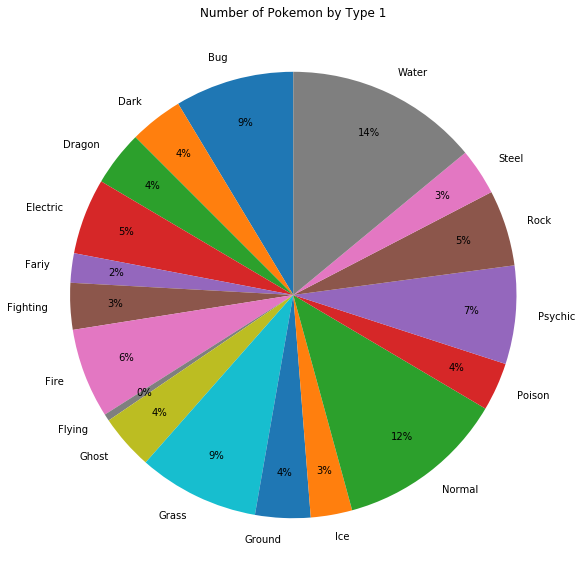

In [5]:
# Looking at the breakdown of type 1
type_count = pd.value_counts(df['Type 1'], sort = True).sort_index()
labels = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fariy', 'Fighting', 'Fire',
         'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
         'Rock', 'Steel', 'Water']
sizes = type_count

fig1, ax1 = plt.subplots(figsize=(10, 10))
#ax1.pie(sizes, labels = labels, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1, startangle=90)
plt.title('Number of Pokemon by Type 1')
#plt.legend(labels, loc=0)
#plt.savefig('pie1.png', bbox_inches='tight')
plt.show()

* 35% Pokemon are classified as either Water, Grass or Normal Type.

<div class="alert alert-block alert-info">
<b>Task 3.1:</b> 
Determine the total amount of Pokemon that fall under the category of <b>Fire Type</b>.
</div>

In [6]:
Fire_df1 = df[df['Type 1'] == 'Fire']
Fire_df2 = df[df['Type 2'] == 'Fire']
total_Fire_Type = len(Fire_df1) + len(Fire_df2)
print("\u2022 %d Pokemon are considered to be Fire Type." % (total_Fire_Type))

• 64 Pokemon are considered to be Fire Type.


<div class="alert alert-block alert-info">
<b>Task 3.2:</b> 
Print a list of all <b>Fire Type</b> Pokemon
</div>

In [7]:
Fire_listgroup1 = df.groupby("Type 1")
Fire_listgroup2 = df.groupby("Type 2")
Fire_list1 = Fire_listgroup1.get_group("Fire").set_index("#")
Fire_list2 = Fire_listgroup2.get_group("Fire").set_index("#")
mergedlist_Fire = pd.concat([Fire_list1, Fire_list2])
display(mergedlist_Fire)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Lampent,Ghost,Fire,370,60,40,60,95,60,55,5,False
609,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False
636,Larvesta,Bug,Fire,360,55,85,55,50,55,60,5,False


<div class="alert alert-block alert-info">
<b>Task 4.1:</b> 
Determine the total amount of Pokemon that fall under the category of <b>Grass Type</b>.
</div>

In [8]:
Grass_df1 = df[df['Type 1'] == 'Grass']
Grass_df2 = df[df['Type 2'] == 'Grass']
total_Grass_Type = len(Grass_df1) + len(Grass_df2)
print("\u2022 %d Pokemon are considered to be Grass Type." % (total_Grass_Type))

• 95 Pokemon are considered to be Grass Type.


<div class="alert alert-block alert-info">
<b>Task 4.2:</b> 
Print a list of all <b>Grass Type</b> Pokemon
</div>

In [9]:
Grass_listgroup1 = df.groupby("Type 1")
Grass_listgroup2 = df.groupby("Type 2")
Grass_list1 = Grass_listgroup1.get_group("Grass").set_index("#")
Grass_list2 = Grass_listgroup2.get_group("Grass").set_index("#")
mergedlist_Grass = pd.concat([Grass_list1, Grass_list2])
mergedlist_Grass

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False


<div class="alert alert-block alert-info">
<b>Task 5:</b> 
Determine the Pokemon with max value and index for the following:

<ul style="list-style-type:disc;">
  <li>Attack</li>
  <li>Defense</li>
  <li>Sp. Atk</li>
  <li>Sp. Def</li>
  <li>Speed</li>
</ul>
</div>


**Attack**

In [10]:
max_attack = df.loc[df["Attack"].idxmax()]
max_attack
print("The Pokemon with the greatest base attack is %s" % (max_attack.Name))

The Pokemon with the greatest base attack is MewtwoMega Mewtwo X


**Defense**

In [11]:
max_defense = df.loc[df["Defense"].idxmax()]
max_defense
print("The Pokemon with the greatest base defense is %s" % (max_defense.Name))

The Pokemon with the greatest base defense is SteelixMega Steelix


**Sp. Atk**

In [12]:
max_spatk = df.loc[df["Sp. Atk"].idxmax()]
max_spatk
print("The Pokemon with the greatest base Sp. Atk is %s" % (max_spatk.Name))

The Pokemon with the greatest base Sp. Atk is MewtwoMega Mewtwo Y


**Sp. Def**

In [13]:
max_spdef = df.loc[df["Sp. Def"].idxmax()]
max_spdef
print("The Pokemon with the greatest base Sp. Def is %s" % (max_spdef.Name))


The Pokemon with the greatest base Sp. Def is Shuckle


**Speed**

In [14]:
max_speed = df.loc[df["Speed"].idxmax()]
max_speed
print("The Pokemon with the greatest base Speed is %s" % (max_speed.Name))

The Pokemon with the greatest base Speed is DeoxysSpeed Forme


<div class="alert alert-block alert-info">
<b>Task 6.1:</b> 
Output a horizontal bar graph to display the <b>Total</b> stat for all the <b>Fire Type</b> Pokemon
</div>

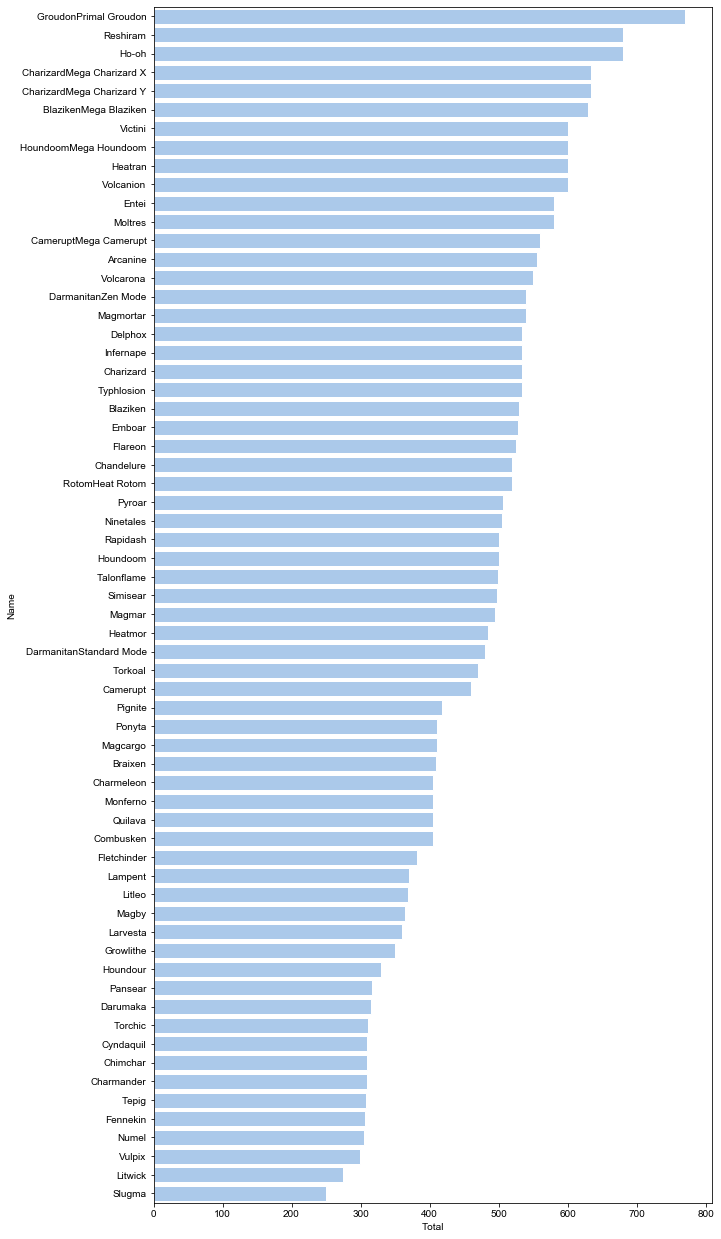

In [15]:
fire_df1 = df[df['Type 1'] == "Fire"]
fire_df2 = df[df['Type 2'] == "Fire"]
fire_df = pd.concat([fire_df1,fire_df2])
f, ax = plt.subplots(figsize=(10, 22))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x = "Total", y = "Name", data=fire_df.sort_values("Total", ascending = False), color="b")
sns.set_color_codes("muted")

 * GroudonPrimal Groudon is the strongest Fire Type Pokemon based on Total Stats.

<div class="alert alert-block alert-info">
<b>Task 6.2:</b> 
Output a horizontal bar graph to display the <b>Total</b> stat for all the <b>Grass Type</b> Pokemon
</div>

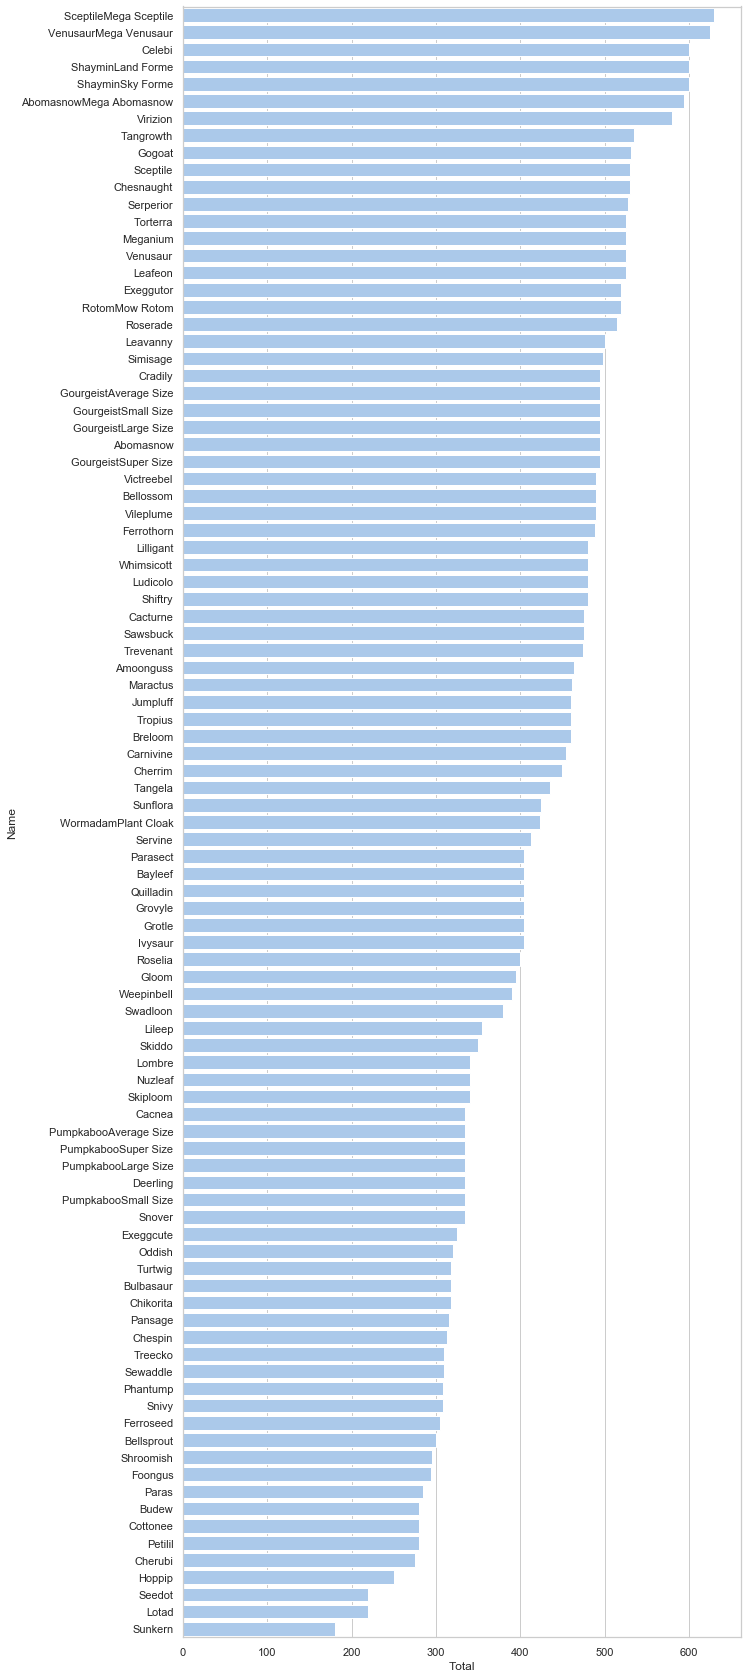

In [16]:
grass_df1 = df[df['Type 1'] == "Grass"]
grass_df2 = df[df['Type 2'] == "Grass"]
grass_df = pd.concat([grass_df1,grass_df2])
f, ax = plt.subplots(figsize=(10, 30))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x = "Total", y = "Name", data=grass_df.sort_values("Total", ascending = False), color="b")
sns.set_color_codes("muted")


 * SceptileMega Sceptile is the strongest Grass Type Pokemon based on Total Stats.

<div class="alert alert-block alert-info">
<b>Task 7:</b> 
Compare each generation and produce a Pearson Correlation Chart and Histogram for each variable.
</div>

### Theory
___
Before diving into the task, let's look at the theory behind **correlation**. It can be defined as a statistic intended to quantify as the strength of the relationship between two variables. One of the biggest challenges is comparing variables with different units. To bypass this issue there are two options:

1. Transform each value to a **standard score**, which is the number of standard deviations from the mean. This transform leads to the "*Pearson product-moment correlation coefficient*".

2. Transform each value to its **rank**, which is its index in the sorted list of values. This transform leads to the "*Spearman rank correlation coefficient*". 

If $X$ is a series of *n* values, $x_i$, we can convert to standard scores by subtracting the mean and dividing it by the standard deviation:
$$z_i = (x_i - \mu)/\sigma$$
The numerator is a deviation itself: the distance from the mean. Dividing by $\mu$ standardizes the deviation thus, the values of $Z$ are dimensionless and their distribution will have a mean of 0 and variance of 1. 

### Covariance
___
**Covariance** is a measure of the tendency of two variables to vary together. So, let's say we have two series, $X$ and $Y$, their deviations from the mean are: 

$$dx_i = x_i - (\bar x)$$
$$dx_i = y_i - (\bar y)$$

where $\bar x$ is the sample mean of $X$ and $\bar y$ os tje sample mean of $Y$. If $X$ and $Y$ vary together, their deviations will usually have the same sign. Multiplying them together, the product will be positive when they are both positive or both negative. So the sum of the products gives a measure of the tendency to vary together:

$$Cov(X,Y)= \frac{1}{n}\sum dx_i dy_i$$

Keep in mind that the length of the series must be equal for the equation to work. Where n represents the length of the two series.
### Pearson's Correlation
Covariance is useful in some computations, but it is seldom reported as a summary statistic because its hard to interpret. Among other problems, it should be noted that the units are the product of the units $X$ and $Y$. A solution is to divide the deviations by the standard deviation, which results in standard scores, and compute the product of standard scores:

$$p_i = \frac{(x_i - \bar x)}{S_X} \frac{(y_i - \bar y)}{S_Y}$$

Where $S_X$ and $S_Y$ are the standard deviations of $X$ and $Y$. The mean of these products can be represented by:

$$\rho = \frac{1}{n} \sum p_i $$

Simplifying the above equation by factoring $S_X$ and $S_Y$ results in the following: 

$$\rho = \frac{Cov(X,Y)}{S_X S_Y} $$

Pearson's correlation ranges between the limits of -1 and +1. If $\rho$ is positive, the correlation is positive, which measn that when the variable is high, the others tend to be high as well. If $\rho$ is negative, the correlation is negative, so when one variable is high, the other is low. $\rho$ indicates the strength of the correlation. If the value is 1 or -1 then it is perfectly correlated. Thus, one can make an accurate prediction about the other.

##### Control (All Gen)


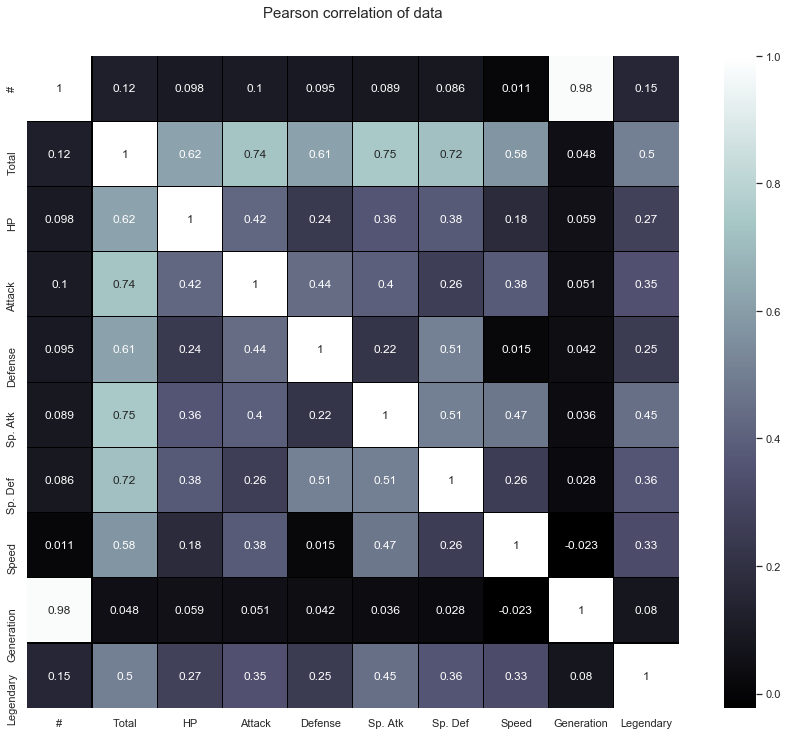

In [17]:
#colormap = plt.cm.pastel, cmap=colormap,
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of data', y = 1.05, size = 15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap = 'bone', linecolor='black', annot=True)

#color map looking at Pearson correlations

 * Sp. def and defense as well as sp. attack and sp. def have some of the strongest correlations.

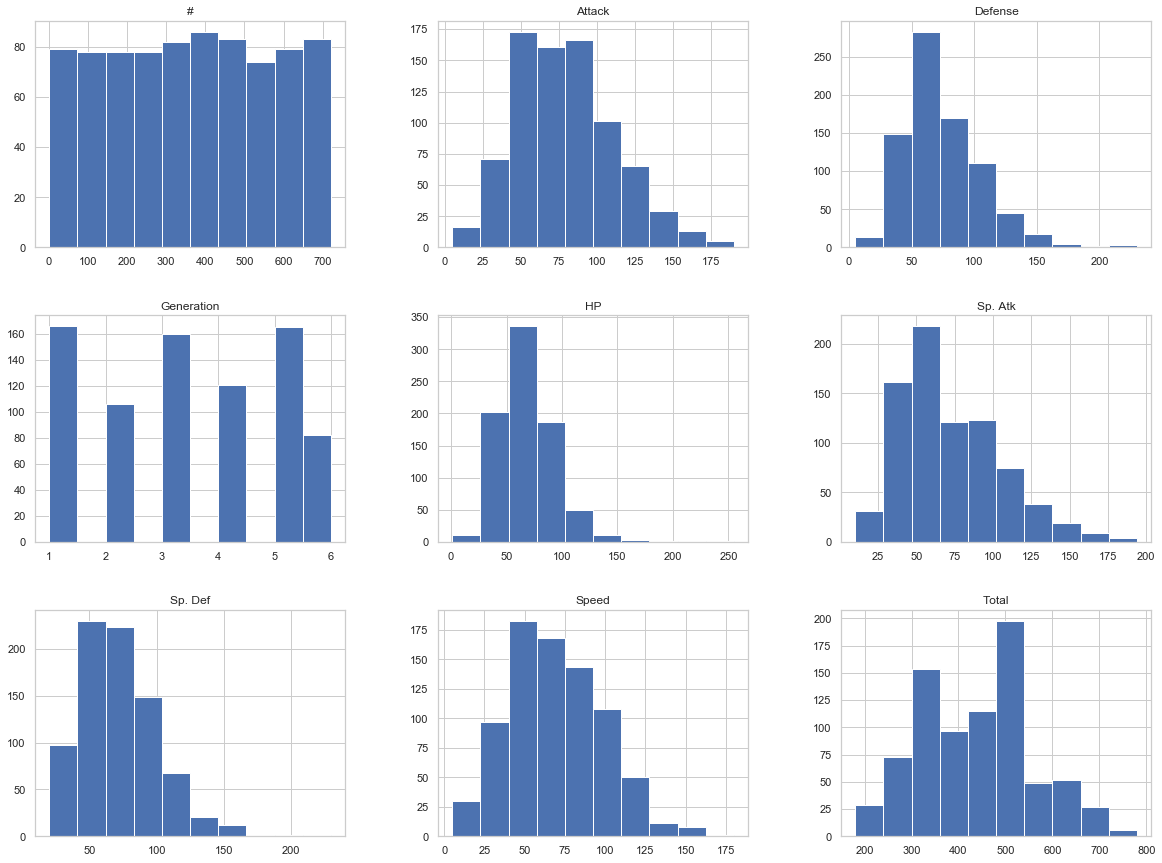

In [18]:
df.hist(column=["#", "Generation", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])
fig=plt.gcf()
fig.set_size_inches(20,15)

#### Generation 1

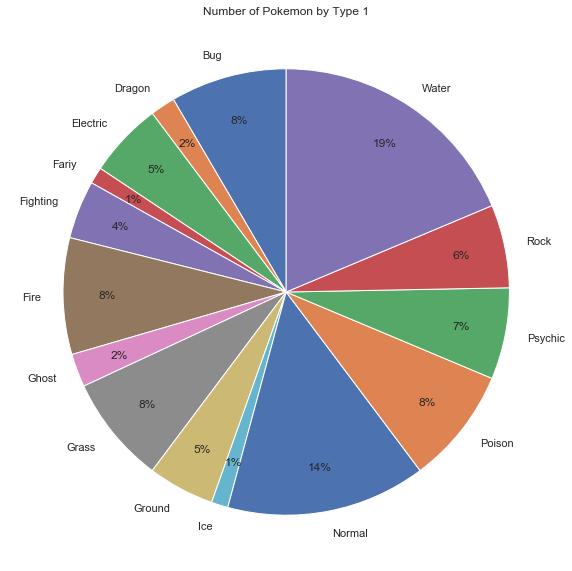

In [19]:
df1 = df[df.Generation == 1]
# Looking at the breakdown of type 1
type_count = pd.value_counts(df1['Type 1'], sort = True).sort_index()
#print(type_count)
labels = ['Bug', 'Dragon', 'Electric', 'Fariy', 'Fighting', 'Fire',
          'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
         'Rock',  'Water']
sizes = type_count
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1, startangle=90)
plt.title('Number of Pokemon by Type 1')
plt.show()

* 33% of pokemon from Gen 1 are either Normal or Water type. 

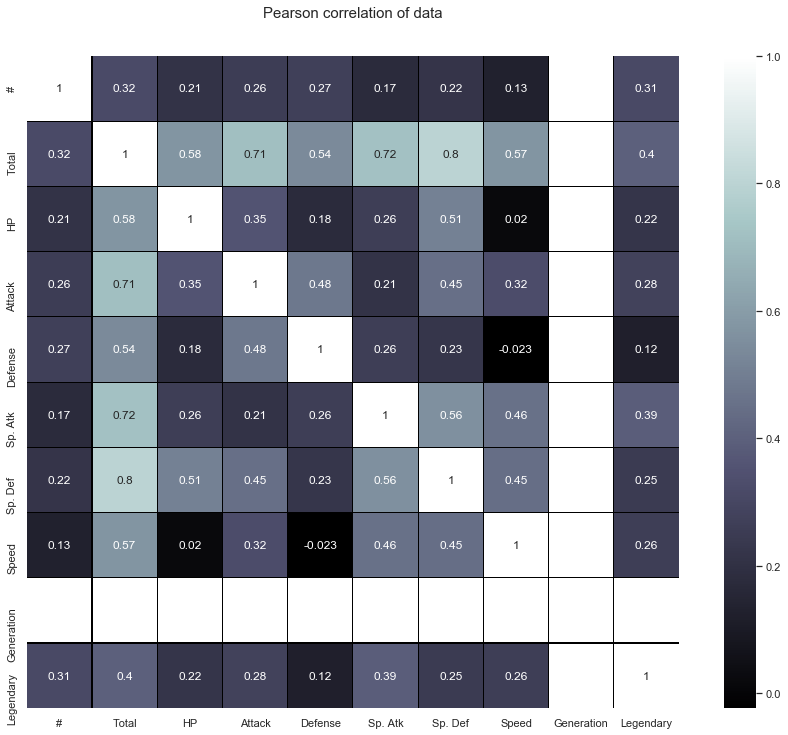

In [20]:
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of data', y = 1.05, size = 15)
sns.heatmap(df1.corr(), linewidths=0.1, vmax=1.0, square=True, cmap = 'bone', linecolor='black', annot=True)


* Sp. Atk and Sp. Def have the highest correlation, even higher then our control. This means in Gen 1 Sp. Atk and Sp. Def tended to go hand in hand.

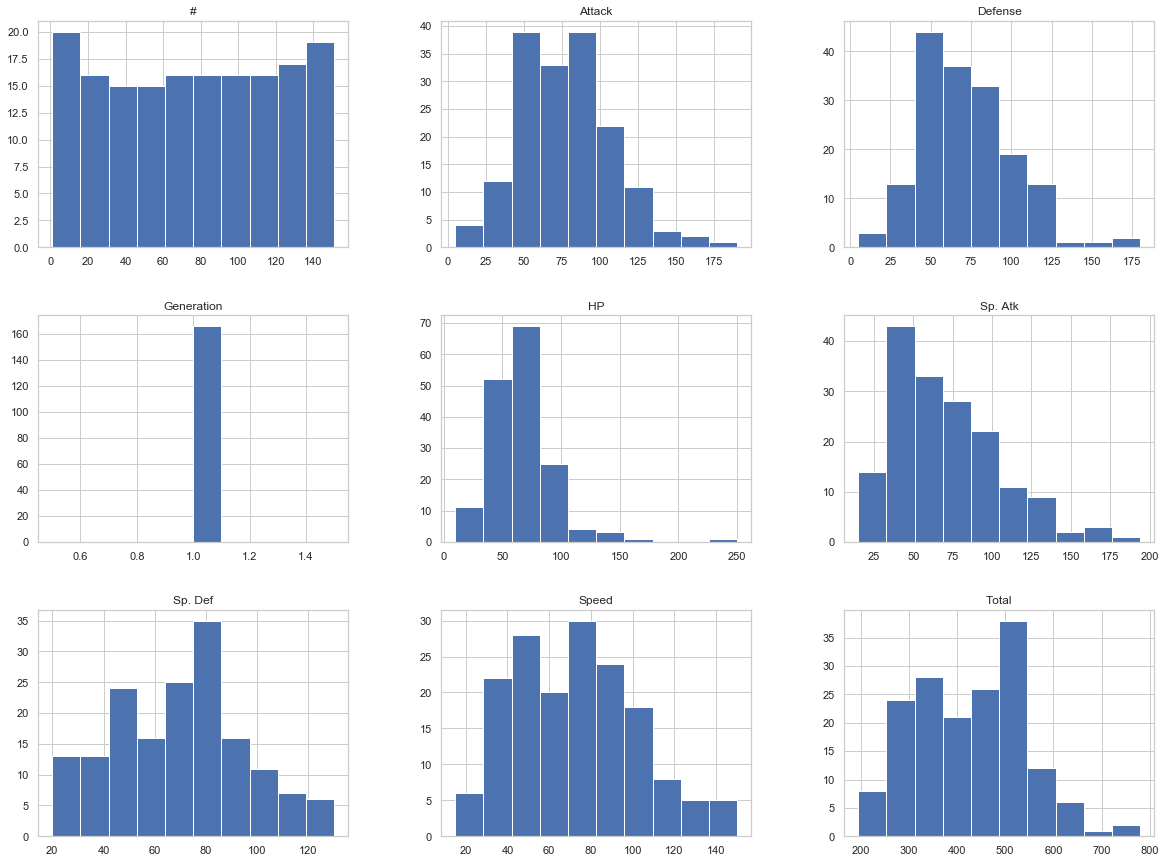

In [21]:
df1.hist(column=["#", "Generation", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])
fig=plt.gcf()
fig.set_size_inches(20,15)

#### Generation 2

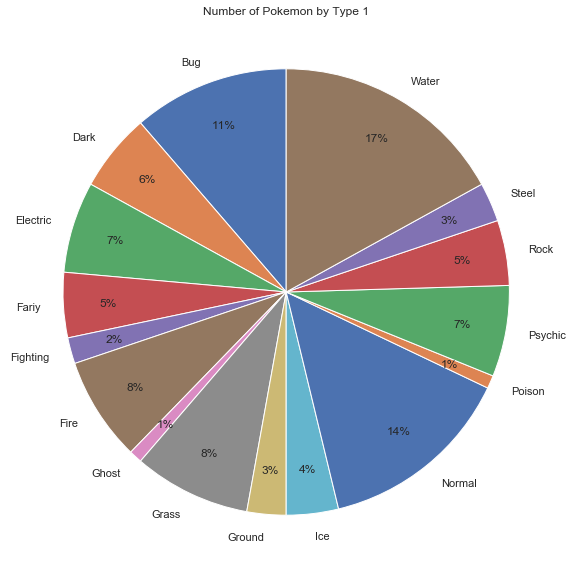

In [22]:
df1 = df[df.Generation == 2]
# Looking at the breakdown of type 1
type_count = pd.value_counts(df1['Type 1'], sort = True).sort_index()
#print(type_count)
labels = ['Bug', 'Dark', 'Electric', 'Fariy', 'Fighting', 'Fire',
          'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
         'Rock', 'Steel', 'Water']
sizes = type_count
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1, startangle=90)
plt.title('Number of Pokemon by Type 1')
plt.show()

 * 31% of pokemon from Gen 2 are either Normal or Water type. 

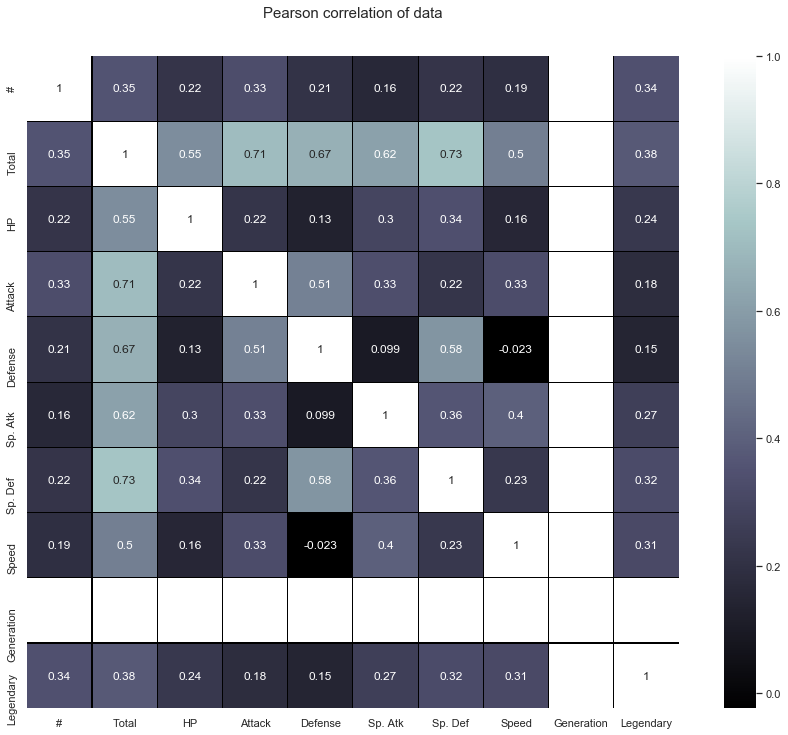

In [23]:
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of data', y = 1.05, size = 15)
sns.heatmap(df1.corr(), linewidths=0.1, vmax=1.0, square=True, cmap = 'bone', linecolor='black', annot=True)

In Gen 2 it seems that the two def stats (Sp. Def and Defense) correlate best, but we see that Sp. Def and Sp. Atk correlation almost completely drops off compared to our control and Gen 1. The other new trend is between attack and defense which have a strong correlation compared to the rest of the stats.

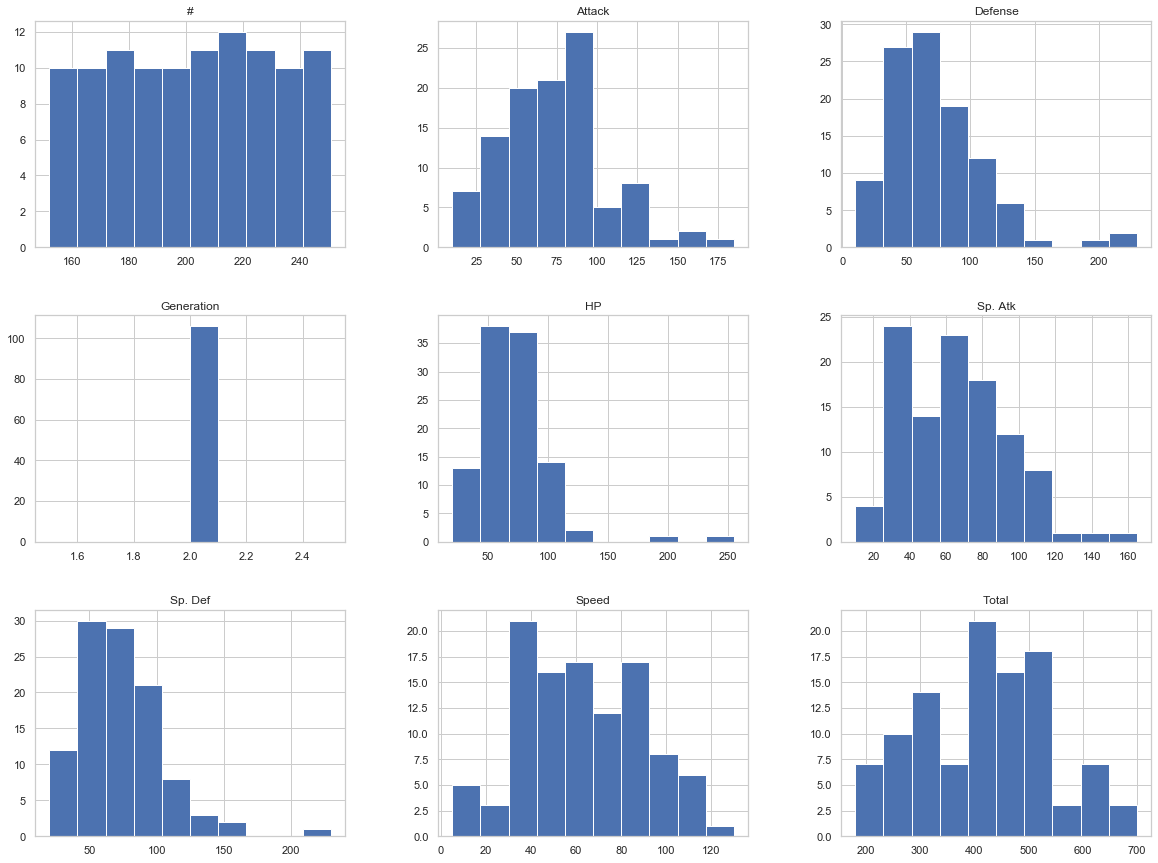

In [24]:
df1.hist(column=["#", "Generation", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])
fig=plt.gcf()
fig.set_size_inches(20,15)

#### Generation 3

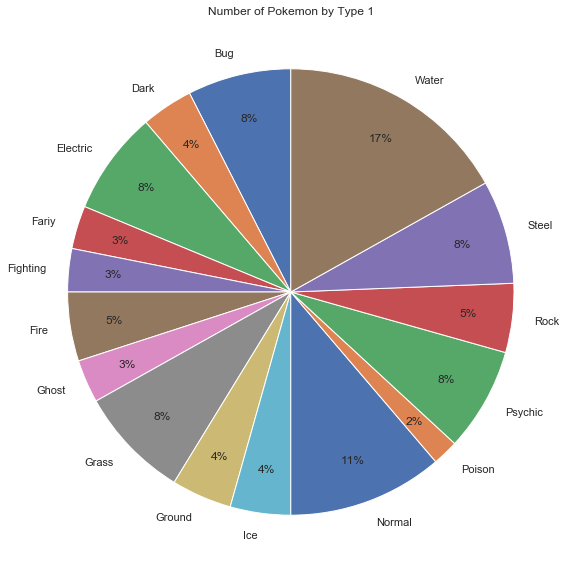

In [25]:
df1 = df[df.Generation == 3]
type_count = pd.value_counts(df1['Type 1'], sort = True).sort_index()
#print(type_count)
labels = ['Bug', 'Dark',  'Electric', 'Fariy', 'Fighting', 'Fire',
          'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
         'Rock', 'Steel', 'Water']
sizes = type_count
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1, startangle=90)
plt.title('Number of Pokemon by Type 1')
plt.show()

*  28% of Pokemon in this Gen are classified as Water or Normal type.

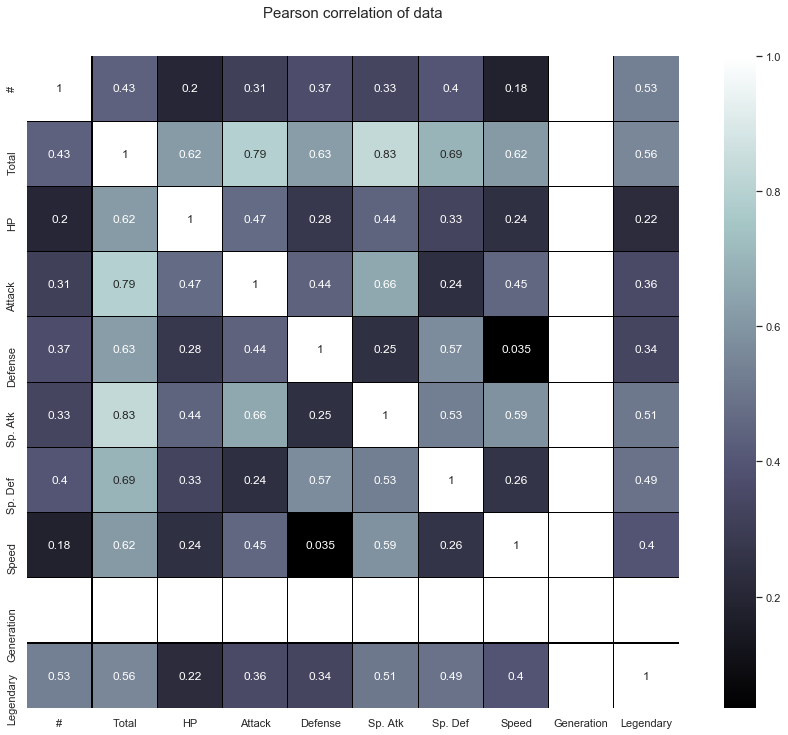

In [26]:
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of data', y = 1.05, size = 15)
sns.heatmap(df1.corr(), linewidths=0.1, vmax=1.0, square=True, cmap = 'bone', linecolor='black', annot=True)

Gen 3 has a high correlation between Sp. Atk and Attack. Speed and Sp. Atk also have high correlation which is a new correlation. The trend with the Defenses (Sp. Def and Defense) continue also.

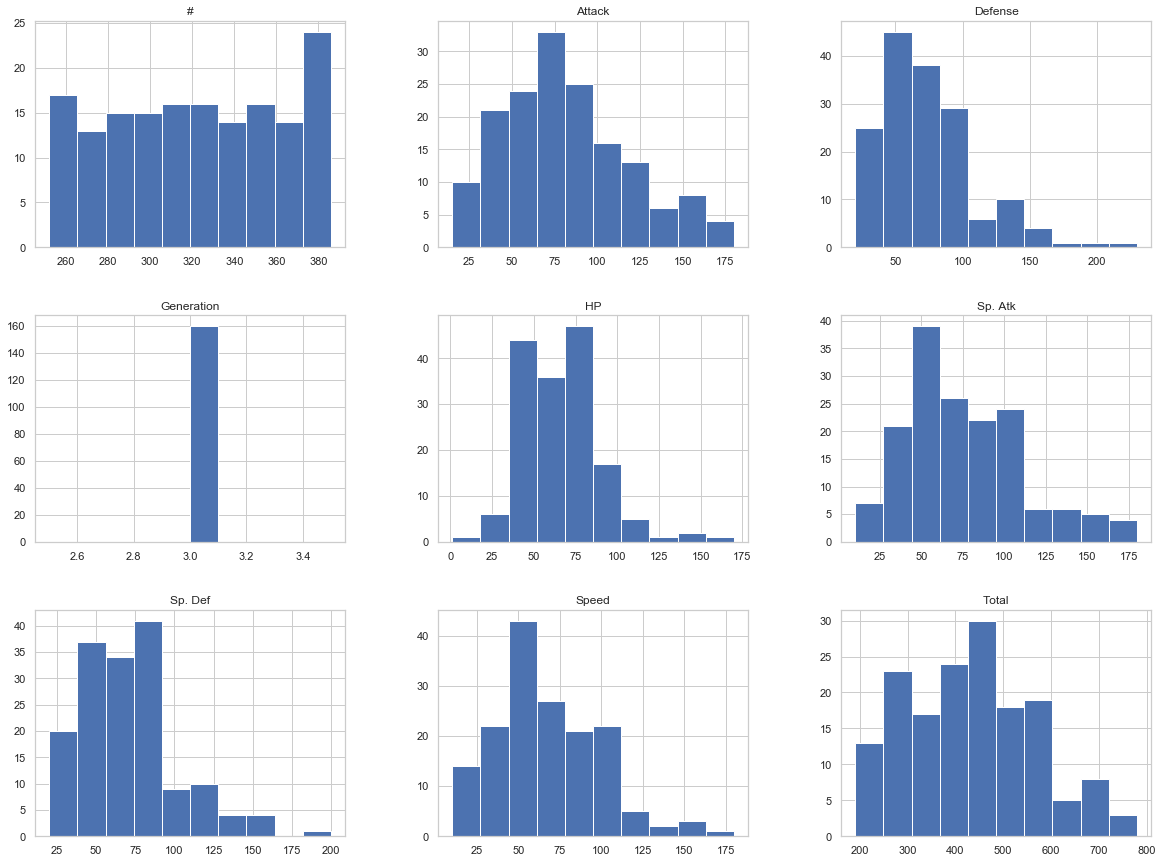

In [27]:
df1.hist(column=["#", "Generation", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])
fig=plt.gcf()
fig.set_size_inches(20,15)

#### Generation 4

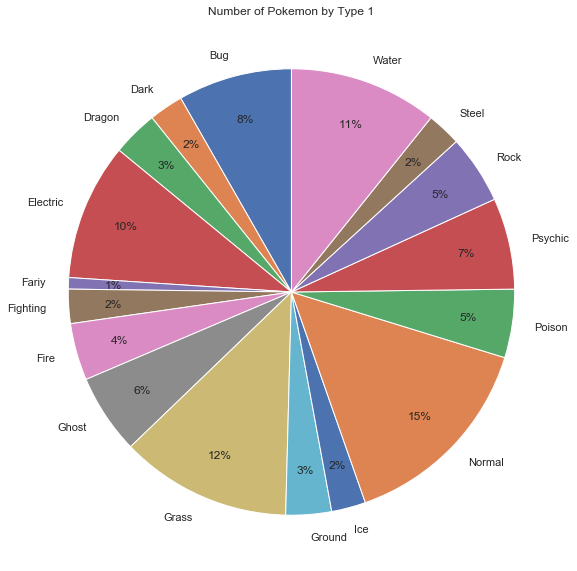

In [28]:
df1 = df[df.Generation == 4]
type_count = pd.value_counts(df1['Type 1'], sort = True).sort_index()
#print(type_count)
labels = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fariy', 'Fighting', 'Fire',
          'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
         'Rock', 'Steel', 'Water']
sizes = type_count
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1, startangle=90)
plt.title('Number of Pokemon by Type 1')
plt.show()

* 38% of the Pokemon in this Gen are considered either Normal, Grass or Water type.

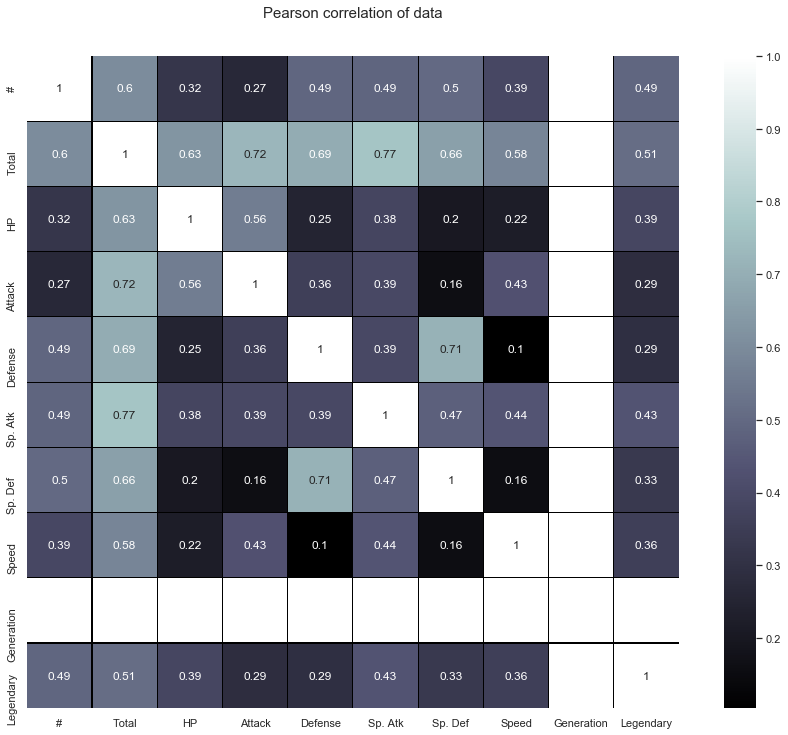

In [29]:
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of data', y = 1.05, size = 15)
sns.heatmap(df1.corr(), linewidths=0.1, vmax=1.0, square=True, cmap = 'bone', linecolor='black', annot=True)

At a 71% correlation Defense and Sp. Def in this generation should be the same or close to the same number. Here we also see a correlation between HP and Attack which is a different trend compared to other gens.

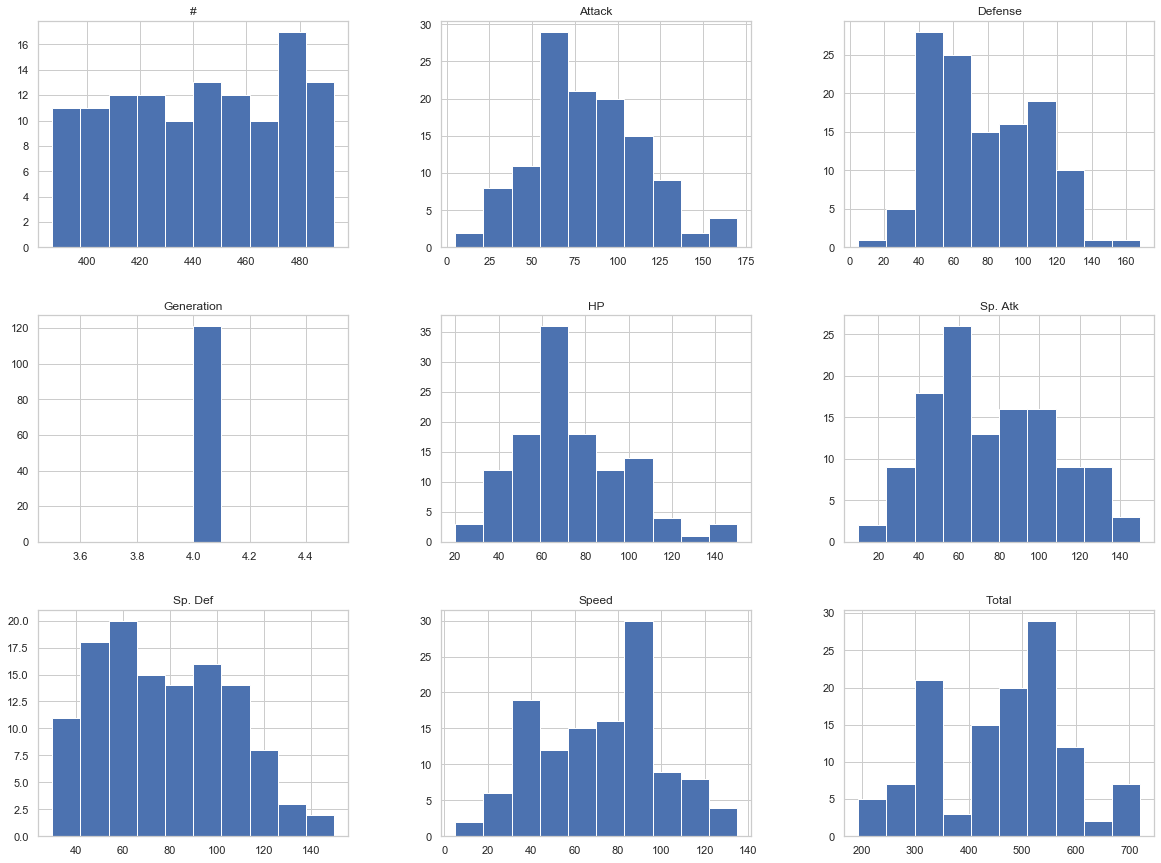

In [30]:
df1.hist(column=["#", "Generation", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])
fig=plt.gcf()
fig.set_size_inches(20,15)

#### Generation 5

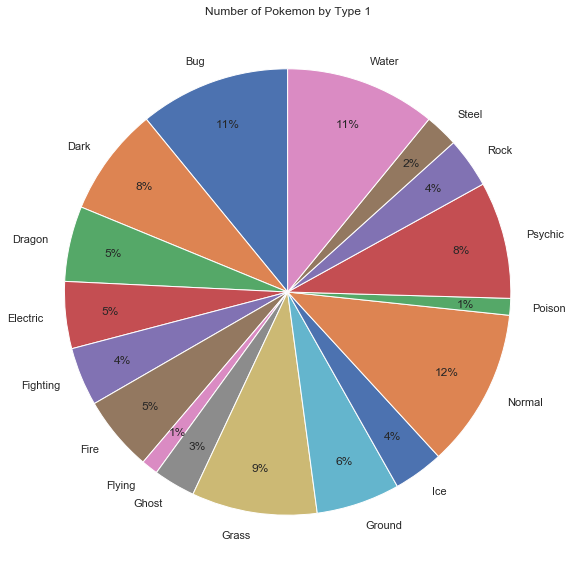

In [31]:
df1 = df[df.Generation == 5]
type_count = pd.value_counts(df1['Type 1'], sort = True).sort_index()
#print(type_count)
labels = ['Bug', 'Dark', 'Dragon', 'Electric',  'Fighting', 'Fire',
         'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
         'Rock', 'Steel', 'Water']
sizes = type_count
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1, startangle=90)
plt.title('Number of Pokemon by Type 1')
plt.show()

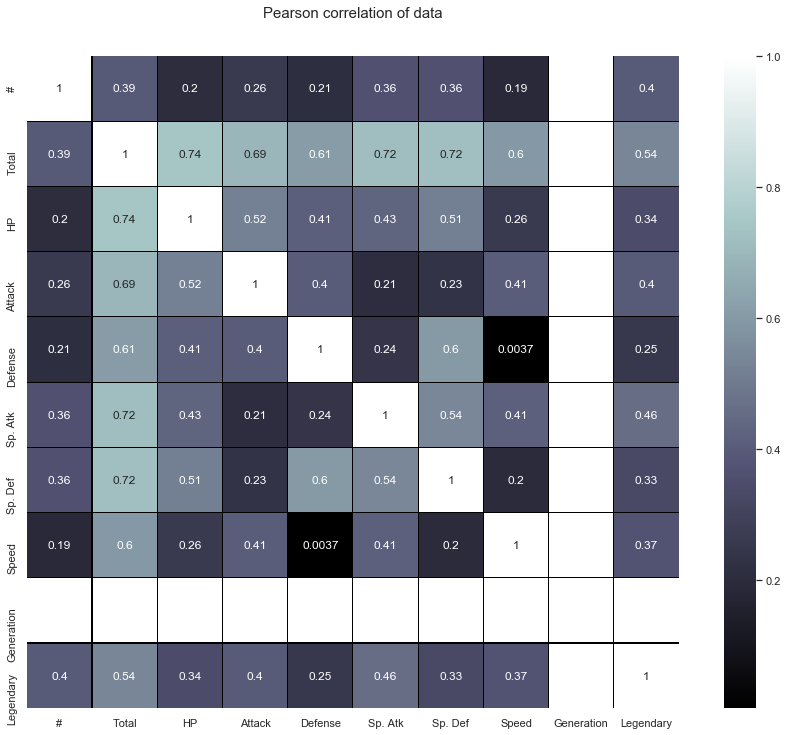

In [32]:
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of data', y = 1.05, size = 15)
sns.heatmap(df1.corr(), linewidths=0.1, vmax=1.0, square=True, cmap = 'bone', linecolor='black', annot=True)

This generation we see a come back of Sp. Atk and Sp. Def correlation, we also still have an unusually high correlation of Sp. Def and Defense. The correlation between Attack and HP from Gen 4 is also evident here.

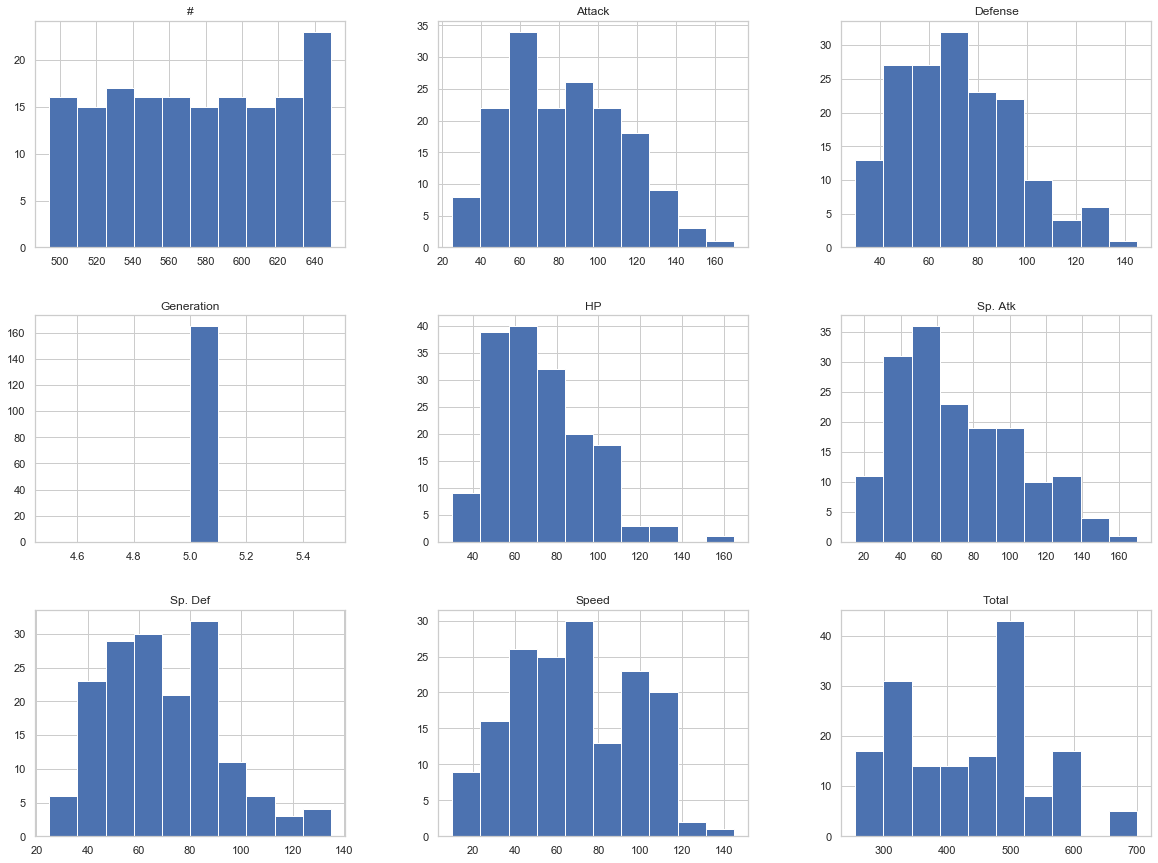

In [33]:
df1.hist(column=["#", "Generation", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])
fig=plt.gcf()
fig.set_size_inches(20,15)

#### Generation 6

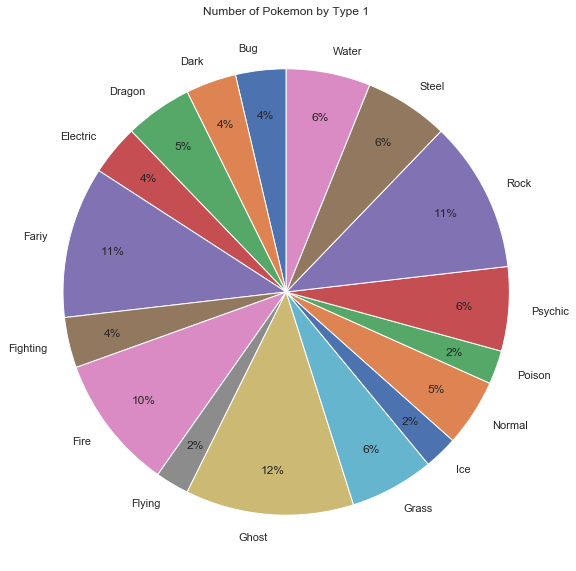

In [34]:
df1 = df[df.Generation == 6]
type_count = pd.value_counts(df1['Type 1'], sort = True).sort_index()
#print(type_count)
labels = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fariy', 'Fighting', 'Fire',
         'Flying', 'Ghost', 'Grass',  'Ice', 'Normal', 'Poison', 'Psychic',
         'Rock', 'Steel', 'Water']
sizes = type_count
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1, startangle=90)
plt.title('Number of Pokemon by Type 1')
plt.show()

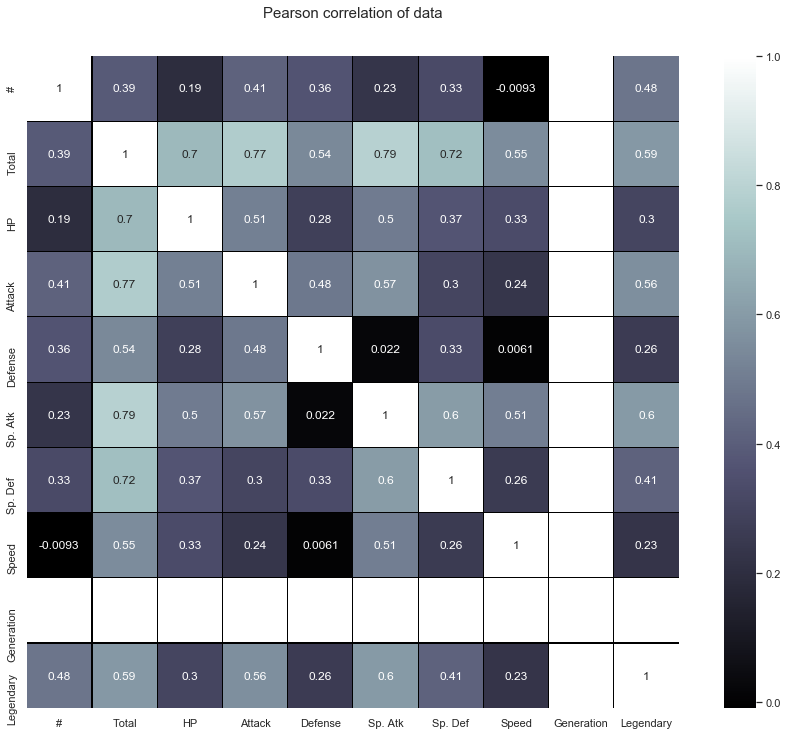

In [35]:
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of data', y = 1.05, size = 15)
sns.heatmap(df1.corr(), linewidths=0.1, vmax=1.0, square=True, cmap = 'bone', linecolor='black', annot=True)

The trends in Gen 6 are Speed and Sp. Atk, Sp. Def and Sp. Atk, Attack and Sp. Atk, and Attack and HP.

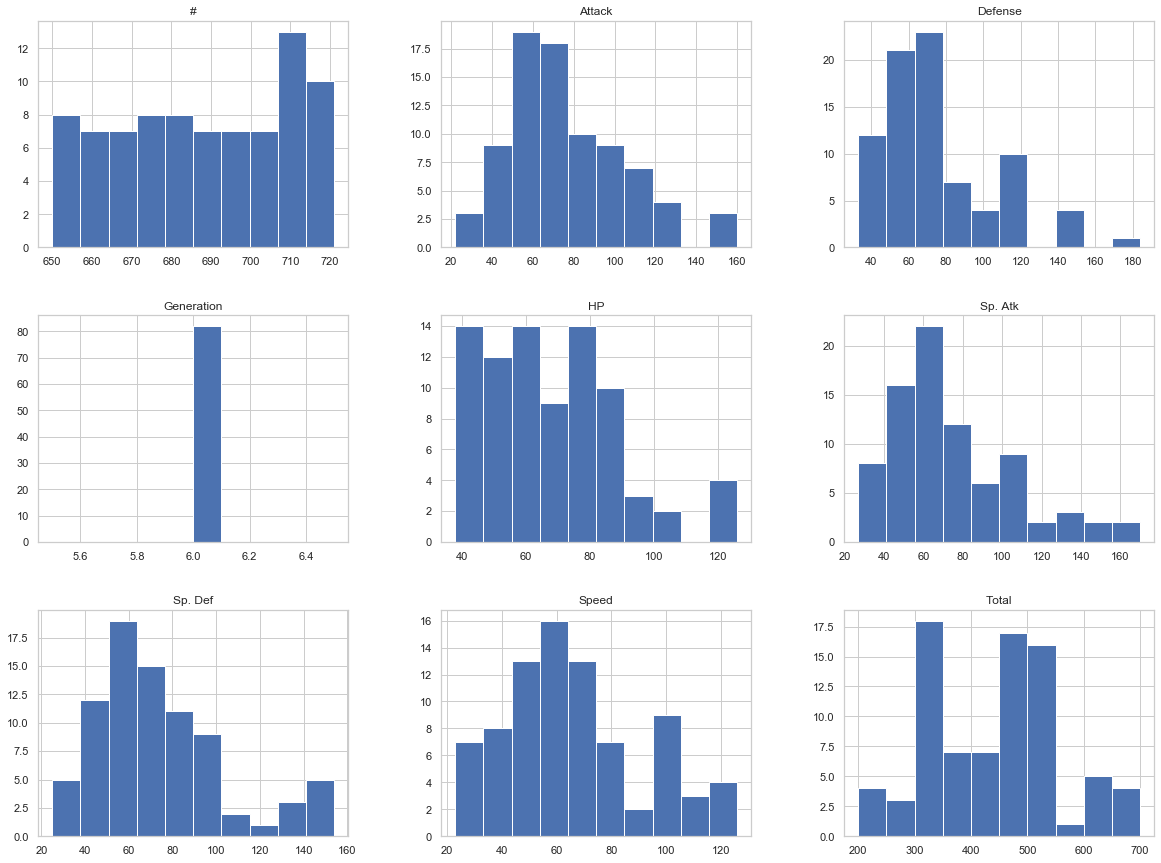

In [36]:
df1.hist(column=["#", "Generation", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])
fig=plt.gcf()
fig.set_size_inches(20,15)

### Conclusion

Each Generation has different correlations and trends. The ideal Generation for predicting a high HP, Sp. Def and Defence would be Gen 4. This is due to the 71% correlation between Sp. Def and Defence parameters. The second best way to select a Pokemon for high overall stats is by checking if they are Legendary. 

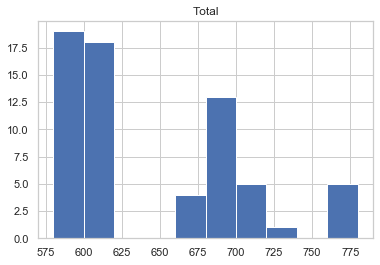

In [37]:
grouping = df[df['Legendary'] == True]
grouping1=grouping.sort_values('Total', ascending = False)
df9 = grouping1.hist(column=["Total"])

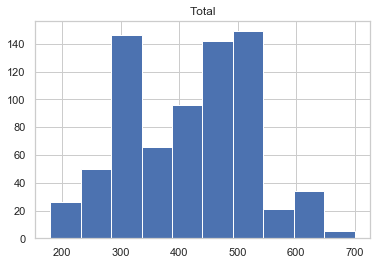

In [38]:
grouping = df[df['Legendary'] == False]
grouping1=grouping.sort_values('Total', ascending = False)
df9 = grouping1.hist(column=["Total"])